In [29]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [30]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, BasicAer, execute
from qiskit.visualization import plot_histogram
from numpy import pi

from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere

___
# Creating superposition and going beyond classical computers

* Reference: https://quantum-computing.ibm.com/composer/docs/guide/creating-superpositions
* Quantum logic gates: https://en.wikipedia.org/wiki/Quantum_logic_gate
* Hadamard product: https://en.wikipedia.org/wiki/Hadamard_product_(matrices)
* Logic gates and operations: https://quantum-computing.ibm.com/composer/docs/iqx/operations_glossary

Hadamard gates can be used to create superpositions of states.

In [31]:
# hadamard gate acting on |0> 
qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

In [32]:
circuit.reset(qreg_q[0])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])
circuit.draw()

┌───┐┌─┐
q_0: ─|0>─┤ H ├┤M├
          └───┘└╥┘
c: 1/═══════════╩═
                0

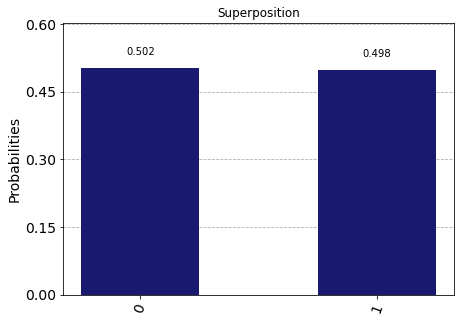

In [33]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(circuit, backend)
plot_histogram(job.result().get_counts(), color='midnightblue', title="Superposition")

## Visualizing the state vector

In [34]:
# using the qsphere to visualize the state vector on a simple quantum circuit
qreg_q = QuantumRegister(1, 'q')

qc = QuantumCircuit(qreg_q)
qc.h(qreg_q[0])

In [35]:
qc.draw()

┌───┐
q_0: ┤ H ├
     └───┘

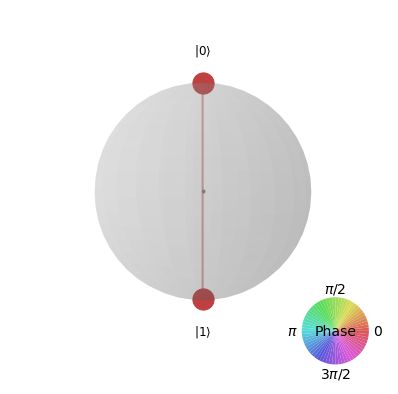

In [36]:
state = Statevector.from_instruction(qc)
plot_state_qsphere(state)

## HADAMARD GATE

In [37]:
# hadamard gate acting on |1>

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.x(qreg_q[0])
circuit.barrier(qreg_q[0])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

In [38]:
circuit.draw()

┌───┐ ░ ┌───┐┌─┐
q_0: ─|0>─┤ X ├─░─┤ H ├┤M├
          └───┘ ░ └───┘└╥┘
c: 1/═══════════════════╩═
                        0

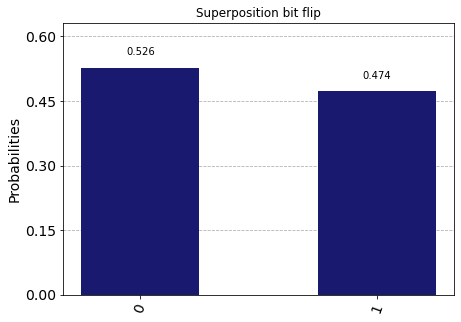

In [39]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(circuit, backend)
plot_histogram(job.result().get_counts(), color='midnightblue', title="Superposition bit flip")

## Interference of superpositions

In [40]:
# putting the circuits back to back will erase the randomness due to the fact that H*H = I 

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

In [41]:
circuit.draw()

┌───┐ ░ ┌───┐┌─┐
q_0: ─|0>─┤ H ├─░─┤ H ├┤M├
          └───┘ ░ └───┘└╥┘
c: 1/═══════════════════╩═
                        0

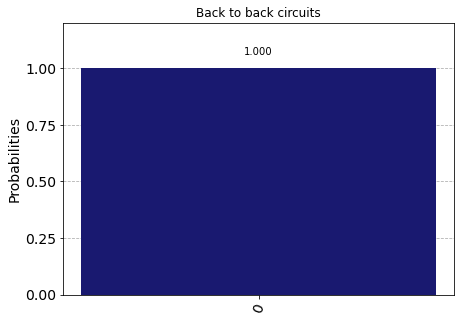

In [42]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(circuit, backend)
plot_histogram(job.result().get_counts(), color='midnightblue', title="Back to back circuits")

### Explaining the results

The Hadamard operator can be described as:
$$
H = \frac{1}{\sqrt2}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
$$

Hadamard gate acting on $|0>$: 
$$ H|0> = \frac{1}{\sqrt2} (|0> + |1>)$$
Hadamard gate acting on $|1>$: 
$$ H|1> = \frac{1}{\sqrt2}(|0> - |1>)$$

Effectively the second Hadamard gate acts on the output of the first Hadamard gate and the $|1>$ basis vector vanishes from the sum. 

**OR**

We can just calculate $H*H$: 

$$
H*H = \frac{1}{\sqrt2}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
\frac{1}{\sqrt2}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
= \begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}
$$

Reference **Born Rule** for wave function and probability amplitudes: https://en.wikipedia.org/wiki/Born_rule

### Visualizing the state vector for the combination of both circuits

In [43]:
# using the qsphere to visualize the state vector on a simple quantum circuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere

qreg_q = QuantumRegister(1, 'q')

qc = QuantumCircuit(qreg_q)
qc.h(qreg_q[0])
qc.barrier(qreg_q[0])
qc.h(qreg_q[0])

In [44]:
qc.draw()

┌───┐ ░ ┌───┐
q_0: ┤ H ├─░─┤ H ├
     └───┘ ░ └───┘

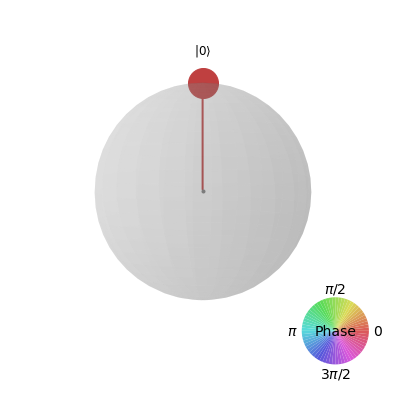

In [45]:
# we can see that the state vector is only pointed along |0> 
state = Statevector.from_instruction(qc)
plot_state_qsphere(state)